In [583]:
import pandas as pd
#import geocoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Reading the csv and making summary statistics/charts

In [584]:
filename1 = 'credit-data'
df = pd.read_csv(filename1 + '.csv', encoding = "ISO-8859-1")

In [585]:
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0


In [586]:
df['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

Summary statistics of Debt Ratio. This shows that the highest debt ratio is 329664 %. This couldn't be possible since the debt ratio could not be that high. It looks like a data entry error.

In [587]:
# mean debt ratio for every age group
df_mean_debtratio = df['DebtRatio'].groupby(df['age']).mean().reset_index()
df_mean_debtratio.head()

,age,DebtRatio
0,0,0.436927
1,21,34.961721
2,22,27.833068
3,23,23.057826
4,24,47.577035


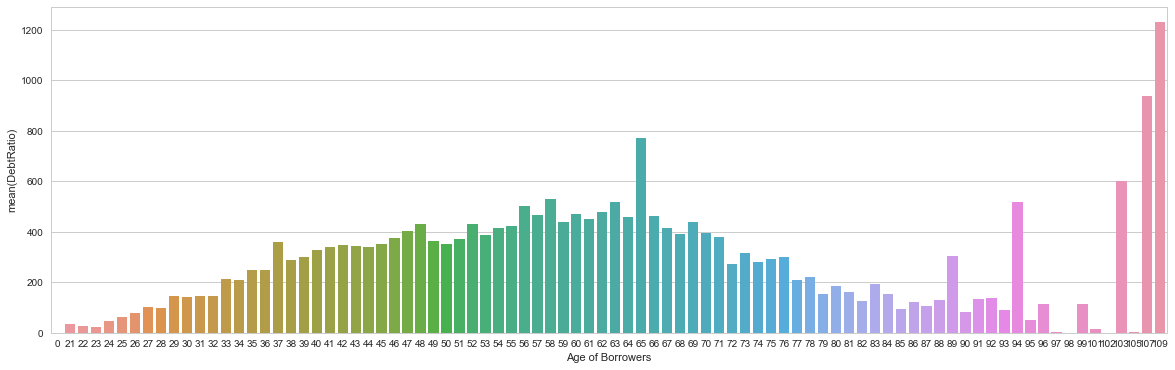

In [588]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(20, 6))
ax = sns.barplot(x='age', y='DebtRatio', data=df_mean_debtratio)
ax.set(xlabel='Age of Borrowers')
sns.plt.show()

As seen from the table and chart, as the age of the borrowers increase, their mean debt ratio also increases. One explanation for that is that people in mid age careers borrow more and therefore may have difficulties paying dues on time.

We can also see abormal debt ratios as well. People who are very old (i.e. > 100 years of age) have the highest debt ratio. This could be because of data entry errors, or because they have accumulated a lot of debt over the past and relative to their monthly incomes (or pensions), their debt ratios are the highest.

Anomalies: Age zero. It's a data entry error. Also, mean Debt ratios are as high as 1200%. This doesn't make sense.

In [589]:
# count of delinquency for every age group
df_count_delinquincy = df['SeriousDlqin2yrs'].groupby(df['age']).count().reset_index()
df_count_delinquincy.head()

,age,SeriousDlqin2yrs
0,0,1
1,21,183
2,22,434
3,23,641
4,24,816


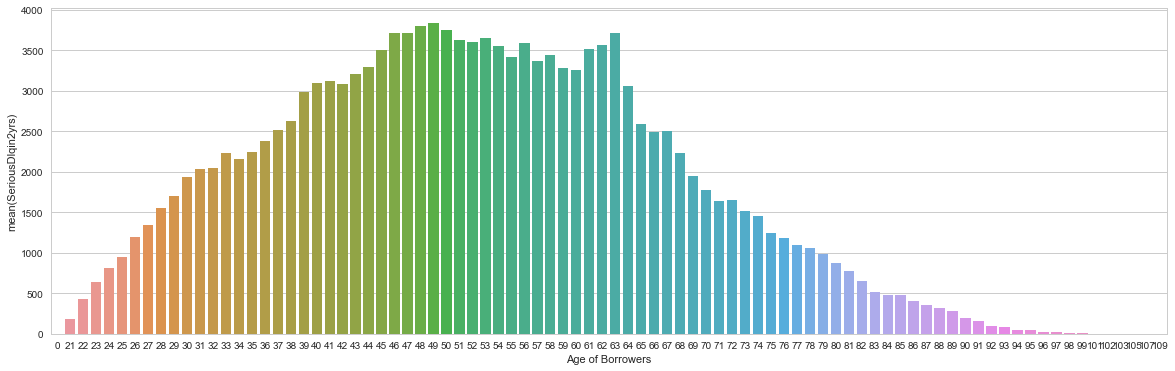

In [590]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(20, 6))
ax = sns.barplot(x='age', y='SeriousDlqin2yrs', data=df_count_delinquincy)
ax.set(xlabel='Age of Borrowers')
sns.plt.show()

This bar chart shows the count of delinquincies in each age group. It shows that as the age of a person increases, the rate of delinquency also increases. It declines sharply after the age of 63. The highest count of delinquincies are registered by people who are nearing their golden jubilee.

In [591]:
# summary statistics of monthly income
df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

The summary statistics of monthly income shows that the mean monthly income is dollars 6,670. We are dealing with a relatively middle-upper class group of people in the dataset. There are also anomalies in the data set i.e. the maximum monthly income for a person in the dataset is 3,008,750. Even Bill Gates doesn't earn that much income in a month.

In [592]:
# correlation of average monthly income with unpaid dues over past 90 days
df_income_90days = df['MonthlyIncome'].groupby(df['NumberOfTimes90DaysLate']).mean().reset_index()
#df_income_90days = pd.options.display.float_format = '{:,.0f}'.format
df_income_90days = df_income_90days.round({'MonthlyIncome': 0})
df_income_90days.sort('MonthlyIncome', ascending=True).head()


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,NumberOfTimes90DaysLate,MonthlyIncome
18,98,2524.0
16,17,2700.0
15,15,3440.0
17,96,3754.0
8,8,4524.0


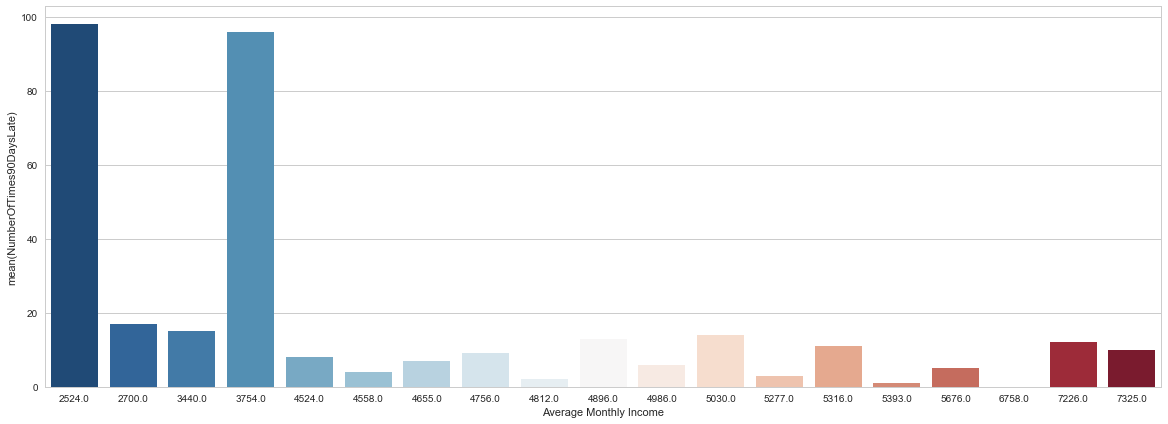

In [593]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(20, 7))
ax = sns.barplot(x='MonthlyIncome', y='NumberOfTimes90DaysLate', palette="RdBu_r", data=df_income_90days)
ax.set(xlabel='Average Monthly Income')
sns.plt.show()

People with average monthly incomes of dollar 2,523 and dollar 3,754 have the highest chances of paying dues beyond 90 days when they are due. This is strange because people earning average incomes between these two incomes have a very small chance of paying their dues beyond 90 days.

On average, there's random fluctuation over different income levels, showing that people even with higher monthly average incomes don't always pay their debts on time.

In [594]:
# correlation between number of dependents and number of open loans and lines of credit bought
df_dependents_credit = df['NumberOfOpenCreditLinesAndLoans'].groupby(df['NumberOfDependents']).count().reset_index()
#df_income_90days.sort('MonthlyIncome', ascending=True).head()
df_dependents_credit.head()

,NumberOfDependents,NumberOfOpenCreditLinesAndLoans
0,0.0,86902
1,1.0,26316
2,2.0,19522
3,3.0,9483
4,4.0,2862


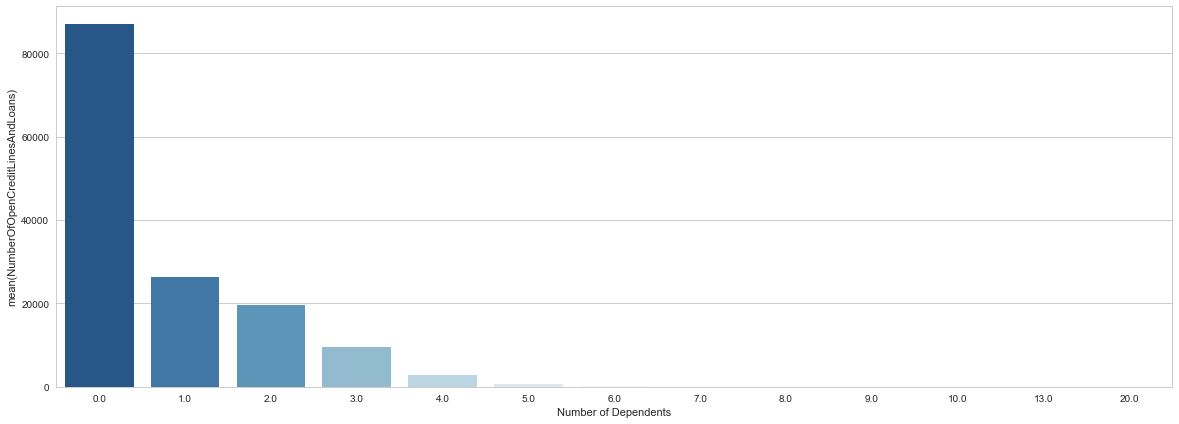

In [595]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(20, 7))
ax = sns.barplot(x='NumberOfDependents', y='NumberOfOpenCreditLinesAndLoans', palette="RdBu_r", data=df_dependents_credit)
ax.set(xlabel='Number of Dependents')
sns.plt.show()

This diagram shows that as the number of dependents increase, people tend to borrow less loans. This is a little surprising since one would expect that having more dependents create more financial needs and therefore the desire to borrow more increases. One explanation for this trend could be that people only tend to have more children (or dependendents) when they become financiall more stable. Thus, more financially stable people take on the responsibility for more dependents.

In [667]:
# correlation between the location of a person and count of positive delinquincies

df_deliquint = df[df['SeriousDlqin2yrs'] == 1]

df_zipcode_delinquincy = df_deliquint['SeriousDlqin2yrs'].groupby(df_deliquint['zipcode']).count().reset_index()
df_zipcode_delinquincy = df_zipcode_delinquincy.sort('SeriousDlqin2yrs', ascending=False)
#df_zipcode_delinquincy['zipcode'] = df_zipcode_delinquincy['zipcode'].astype('str')
df_zipcode_delinquincy.zipcode.dtype

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


dtype('int64')

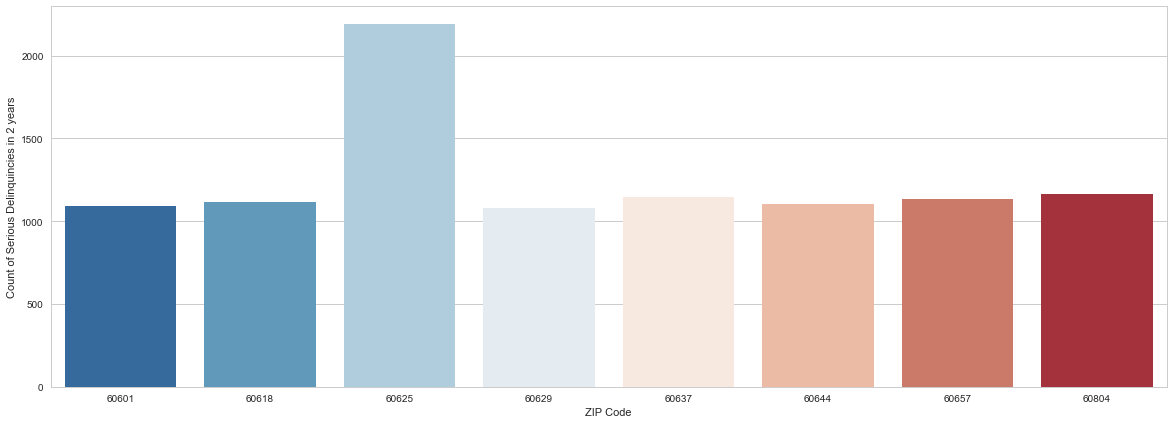

In [669]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(20, 7))
ax = sns.barplot(y='SeriousDlqin2yrs', x='zipcode', palette="RdBu_r", data=df_zipcode_delinquincy)
ax.set(xlabel='ZIP Code')
ax.set(ylabel='Count of Serious Delinquincies in 2 years')
sns.plt.show()

Neighborhood with Zip Codes 60625 has an unusually higher than average count of people who become seriously delinquint. The behavior of the rest of the neighborhoods is almost the same.

In [673]:
# Let's see what are those neighborhoods in which a lot of people become seriously delinquint in two years
import geocoder

In [674]:
geocoder.google('60625', method='reverse')

<[OK] Google - Reverse [N Shore Channel Trail, Chicago, IL 60625, USA]>

# Working with the missing values/NaN's

In [597]:
# checking to see if there are any NaN values
df.isnull().values.any()

True

Yes, there are NaN values.

In [598]:
# how many NaN values are there?
df.isnull().sum().sum()

33655

There are 33,655 NaN values. This is a huge count of values that are NaN.
We can fill in the missing values using the method "mean". I will use the mean of age groups and monthly incomes to fill in the mean values of all the features.

Age Group and Monthly Income, I think, are the most reasonable features for this dataset and the question at hand based on which I can extrapolate data for other features.

In [599]:
# applying average of different features values with respect to ZIP Code
for i in df.columns:
    if i != 'PersonID':
        df[i] = df.groupby('zipcode')[i].apply(lambda x: x.fillna(x.mean()))
        df[i] = df[i].fillna(df[i].mean())

In [600]:
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0


# Feature selection and preprocessing

In [601]:
# using extra trees classifier

In [602]:
from sklearn.ensemble import ExtraTreesClassifier

# extracting out the output variable (Y) and one of the features (Person ID
df_X = df.iloc[:,[2,3,4,5,6,7,8,9,10,11,12]]
X = df_X
Y = df.iloc[:,[1]]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
model.feature_importances_

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


array([ 0.15173957,  0.12172921,  0.0667303 ,  0.06104399,  0.14018068,
        0.13194836,  0.09303676,  0.10736687,  0.03638709,  0.04674476,
        0.0430924 ])

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


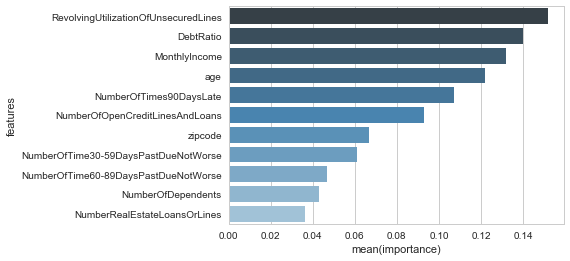

In [603]:
#code inspiration: data gotham
df_feature_importance = pd.DataFrame()
df_feature_importance['importance'] = model.feature_importances_
df_feature_importance['features'] = df_X.columns
df_feature_importance = df_feature_importance.sort('importance', ascending=False)
sns.set_style("whitegrid")
ax = sns.barplot(x='importance', y='features', data=df_feature_importance, palette = "Blues_d")
sns.plt.show()

This shows that out of all the features, revolving utilization of unsecured lines, debt ratio and monthly income are the most important factors in predicting delinquincy. This also makes sense. After this, there's a substantial drop of 2% before age becomes important. From all the factors, the six factors seem to be the most significant in influencing delinquincy.

In [604]:
df['income_bins'] = pd.cut(df.MonthlyIncome, bins=15)
df['income_bins'].value_counts().head()

(-3008.75, 200583.333]      149971
(200583.333, 401166.667]        14
(601750, 802333.333]             5
(401166.667, 601750]             5
(2808166.667, 3008750]           1
Name: income_bins, dtype: int64

Dividing income into bins is not a very useful approach as most income values are clustered in one bin.
Thus, let's discreditize the variables first, and then create the bins.

In [626]:
# function to discreditize continous variables using Standard Scaler

from sklearn.preprocessing import StandardScaler

def transform_continuous_features(feature_name):
    df[feature_name + '_scaled'] = StandardScaler().fit_transform(df[feature_name])

# function to convert categorical variables into dummy varaibles.
# Note: There are a couple of methods to convert the categorical variables into dummy variables. The easiest way to do is
# to use the get_dummies() function of pandas. I'll use that here instead of scikit's Hot Encoder, which does the same.

def transform_categorical_features(df_name, feature_name):
    dummies = pd.get_dummies(df_name[feature_name], prefix=feature_name)
    #df = df.drop(feature_name, axis=1)
    df_name = pd.concat([df_name, dummies], axis=1)
    #return df_name

In [630]:
df['NumberOfDependents'] = df['NumberOfDependents'].astype(int)
df_cat_X = df_feature_importance.iloc[3:6, 1]
list_cat_X = []

for cat in df_cat_X:
    list_cat_X.append(cat)

In [633]:
for feature in df_X.columns:
    if df[feature].dtype == float:
        print(feature)
        transform_continuous_features(feature)
        
    elif df[feature].dtype == int and feature in list_cat_X:
        print(feature)
        transform_categorical_features(df, feature)

RevolvingUtilizationOfUnsecuredLines
age
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTimes90DaysLate


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.resha

In [634]:
# converting from categorical to dummy variables for features that have been identified as "important" from
# the analysis done above.

one_hot = pd.get_dummies(df['age'], prefix='age')
#df = df.drop('NumberOfDependents', axis=1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['NumberOfOpenCreditLinesAndLoans'], prefix='NumberOfOpenCreditLinesAndLoans')
#df = df.drop('NumberOfDependents', axis=1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['NumberOfTimes90DaysLate'], prefix='NumberOfTimes90DaysLate')
#df = df.drop('NumberOfDependents', axis=1)
df = df.join(one_hot)

Now, we will select all the important encoded/scaled features

In [639]:
df_important_features = df.iloc[:,14:]
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,...,NumberOfTimes90DaysLate_9,NumberOfTimes90DaysLate_10,NumberOfTimes90DaysLate_11,NumberOfTimes90DaysLate_12,NumberOfTimes90DaysLate_13,NumberOfTimes90DaysLate_14,NumberOfTimes90DaysLate_15,NumberOfTimes90DaysLate_17,NumberOfTimes90DaysLate_96,NumberOfTimes90DaysLate_98
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,...,0,0,0,0,0,0,0,0,0,0


# Building a classifier (Decision Tree Classifier)

In [620]:
# we first split the data into the training set and the testing set

In [547]:
from sklearn.cross_validation import train_test_split

In [473]:
# same size for both data frames
delinquincy_train, delinquincy_test, outcomes_train, outcomes_test = train_test_split(df_important_features, df.SeriousDlqin2yrs, test_size=0.3, random_state=42)

In [474]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [697]:
clf = tree.DecisionTreeClassifier()
clf.fit(delinquincy_train, outcomes_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [698]:
clf_predict = clf.predict(delinquincy_test)

In [689]:
# based on the confusion matrix
clf.score(delinquincy_test, outcomes_test)

0.8865777777777778

How do we know if this is a good score? In order to evaluate this accuracy number, we have to compare it to a baseline.

In [681]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(outcomes_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(outcomes_test[:, i], y_score[:, i])

(array([ 0.06622222,  0.15792859,  1.        ]),
 array([ 1.       ,  0.1647651,  0.       ]))

In [692]:
from sklearn.metrics import confusion_matrix

In [694]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(outcomes_test, clf_predict)
np.set_printoptions(precision=2)
cnf_matrix

In [ ]:
classes = [0,1]
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

In [ ]:
# evaluating this metric is useless unless you compare it to a certain baseline.... what is a baseline?


In [479]:
# visualizing the tree (please check the path for the pdf file)

def visualize_tree(tree1, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("delinquincy.dot", 'w') as f:
        tree.export_graphviz(tree1, out_file=f, feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [615]:
visualize_tree(clf, df_important_features.columns)